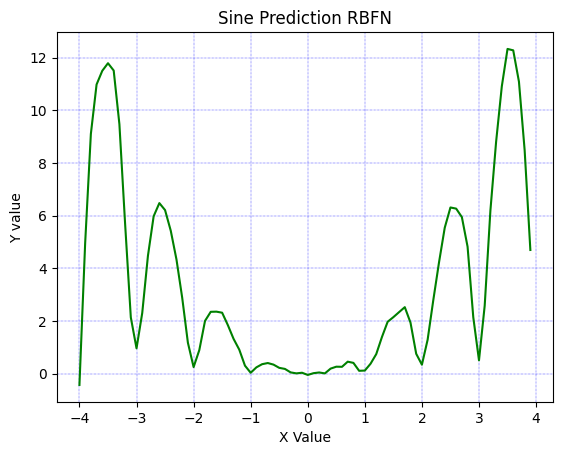

In [51]:
#کتابخانه های مورد نیاز را وارد میکنیم
import numpy as np
import matplotlib.pyplot as plt
import random

#کلاس برای اجرای مراحل RBF 
class RBF(object):
    #سازنده کلاس RBF
    def __init__(self, shape, sigma):
        self.shape = shape
        self.sigma = sigma
        self.centers = None
        self.weights = None
    # یک تابع برای کرنل گوسی تعریف  میکنیم
    def gaussian_kernel(self, center, data_point):
        return np.exp(-1 * self.sigma * (np.linalg.norm(center - data_point) ** 2))
    
    #ماتریس درونیابی
    def interpolation_matrix(self, X):
        matrix = np.zeros(len(X) * self.shape)
        counter = 0
        for inp in X:
            for center in self.centers:
                kernel = self.gaussian_kernel(center, inp)
                matrix[counter] = kernel
                counter += 1
        return matrix.reshape(len(X), self.shape)
    
    #  انتخاب مراکز بصورت رندوم
    def select_centers(self, X):
        centers = []
        random_indices = random.sample(range(0, len(X)), self.shape)
        for rnd in random_indices:
            centers.append(X[rnd])
        return np.array(centers)
    
    #وزن ها را اصلاح میکنیم
    def fit(self, X, Y):
        self.centers = self.select_centers(X)
        im = self.interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(im), Y)
    
    #تابع پیش بینی
    def predict(self, X):
        im = self.interpolation_matrix(X)
        predictions = np.dot(im, self.weights)
        return predictions


#بازه -4 تا 4 را بصورت یک دهم تقسیم میکنیم
x_train_RBF = np.arange(-4, 4, 0.1)
#مقادیر بالا را به تابع sin 
#داده و به عنوان y ذخیره میکنیم
y_train_RBF =(x_train_RBF*x_train_RBF) *np.abs(np.sin(np.pi*x_train_RBF))
#چون تابع مورد نظر بسیار سخت است تعداد مراکز را 50 عدد در نظر میگیریم و به 10 افرایش میدهیم
RBFN = RBF(shape=50,sigma=10)
#rbf تابع سینوس را آموزش میبیند
RBFN.fit(x_train_RBF, y_train_RBF)
# پیش بینی RBF برای مقادیر -4 تا 4
y_pred_RBF = RBFN.predict(x_train_RBF)
# نمایش نمودارها جهت مقایسه
plt.plot(x_train_RBF, y_pred_RBF, 'g-', label='predicted')
plt.title('Sine Prediction RBFN')
plt.ylabel('Y value')
plt.xlabel('X Value')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('rbf.png')        
plt.show()
     

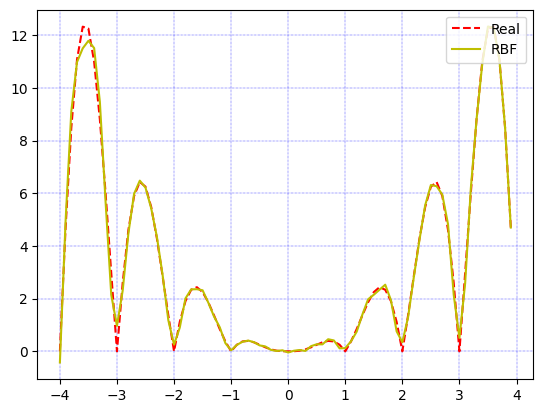

In [52]:
x_train_compare = np.arange(-4, 4, 0.1)


RBF_prediction = RBFN.predict(x_train_compare)

real_values =(x_train_compare*x_train_compare) *np.abs(np.sin(np.pi*x_train_compare)) 

plt.plot(x_train_compare, real_values, 'r--', label='Real')
plt.plot(x_train_compare, RBF_prediction, 'y-', label='RBF')

plt.legend(loc='upper right')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.savefig('compare.png')
plt.show()
     